In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:

# Load the labeled dataset
df = pd.read_csv('df_jobs_cleaned.csv')

# Adjust the dataset for binary classification
# Convert 'VacancyDuration' into two categories: 'Short Vacancy' (< 180 days) and 'Long Vacancy' (>= 180 days)
df['VacancyDuration'] = df['VacancyDuration'].apply(lambda x: 'Short Vacancy' if x < 180 else 'Long Vacancy')

In [3]:
df.to_csv("categorized_vacancy_dataset.csv", index=False)


In [4]:

# Define target variable
target = 'VacancyDuration'
X = df[['SalaryMin', 'SalaryMax', 'DisabilityMention']]  # Select relevant features
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [5]:
# Standardize the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [8]:
# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions with SVM
y_pred_svm = svm_model.predict(X_test_scaled)


In [9]:
C_values = [0.1, 1.0, 10.0]

Results for Linear Kernel:
Linear Kernel with C: 0.1
Accuracy: 0.73
Confusion Matrix:
[[1548  441]
 [ 239  292]]
Classification Report:
               precision    recall  f1-score   support

 Long Vacancy       0.87      0.78      0.82      1989
Short Vacancy       0.40      0.55      0.46       531

     accuracy                           0.73      2520
    macro avg       0.63      0.66      0.64      2520
 weighted avg       0.77      0.73      0.74      2520



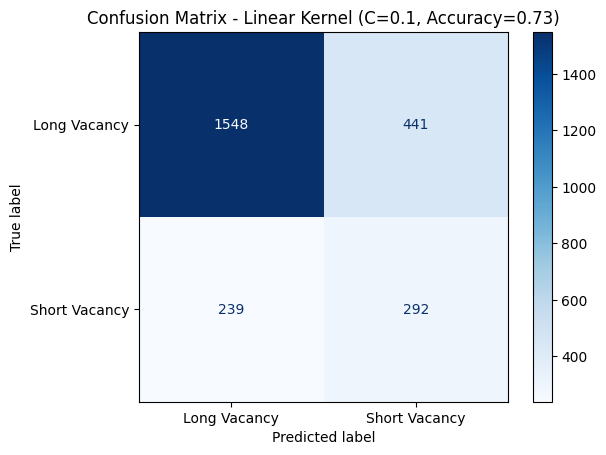

Linear Kernel with C: 1.0
Accuracy: 0.73
Confusion Matrix:
[[1548  441]
 [ 239  292]]
Classification Report:
               precision    recall  f1-score   support

 Long Vacancy       0.87      0.78      0.82      1989
Short Vacancy       0.40      0.55      0.46       531

     accuracy                           0.73      2520
    macro avg       0.63      0.66      0.64      2520
 weighted avg       0.77      0.73      0.74      2520



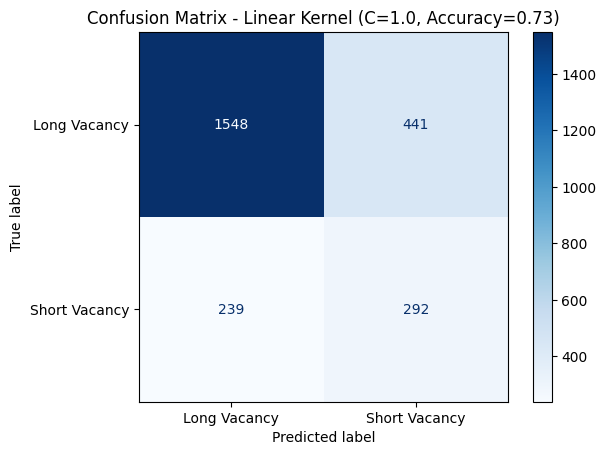

Linear Kernel with C: 10.0
Accuracy: 0.73
Confusion Matrix:
[[1548  441]
 [ 239  292]]
Classification Report:
               precision    recall  f1-score   support

 Long Vacancy       0.87      0.78      0.82      1989
Short Vacancy       0.40      0.55      0.46       531

     accuracy                           0.73      2520
    macro avg       0.63      0.66      0.64      2520
 weighted avg       0.77      0.73      0.74      2520



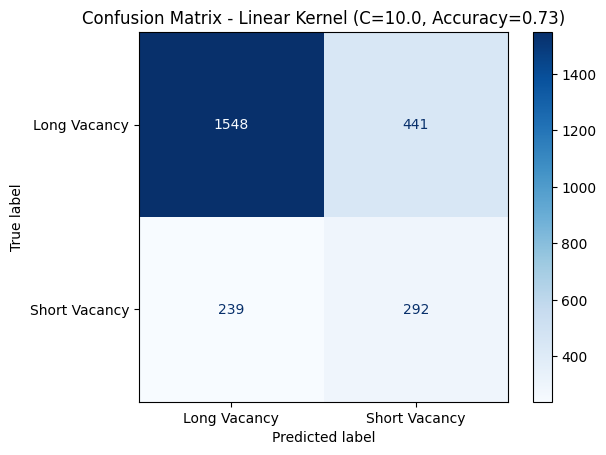

In [10]:

# Linear Kernel
print("Results for Linear Kernel:")
for C in C_values:
    print(f"Linear Kernel with C: {C}")
    model = SVC(kernel='linear', C=C, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - Linear Kernel (C={C}, Accuracy={acc:.2f})")
    plt.show()


Results for Polynomial Kernel:
Polynomial Kernel with C: 0.1
Accuracy: 0.83
Confusion Matrix:
[[1989    0]
 [ 430  101]]
Classification Report:
               precision    recall  f1-score   support

 Long Vacancy       0.82      1.00      0.90      1989
Short Vacancy       1.00      0.19      0.32       531

     accuracy                           0.83      2520
    macro avg       0.91      0.60      0.61      2520
 weighted avg       0.86      0.83      0.78      2520



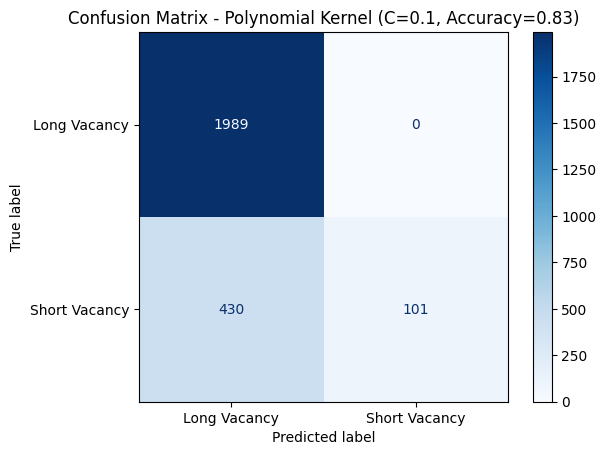

Polynomial Kernel with C: 1.0
Accuracy: 0.82
Confusion Matrix:
[[1958   31]
 [ 430  101]]
Classification Report:
               precision    recall  f1-score   support

 Long Vacancy       0.82      0.98      0.89      1989
Short Vacancy       0.77      0.19      0.30       531

     accuracy                           0.82      2520
    macro avg       0.79      0.59      0.60      2520
 weighted avg       0.81      0.82      0.77      2520



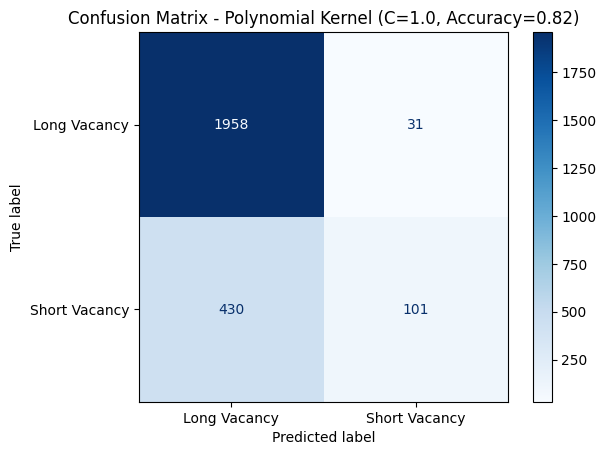

Polynomial Kernel with C: 10.0
Accuracy: 0.83
Confusion Matrix:
[[1989    0]
 [ 430  101]]
Classification Report:
               precision    recall  f1-score   support

 Long Vacancy       0.82      1.00      0.90      1989
Short Vacancy       1.00      0.19      0.32       531

     accuracy                           0.83      2520
    macro avg       0.91      0.60      0.61      2520
 weighted avg       0.86      0.83      0.78      2520



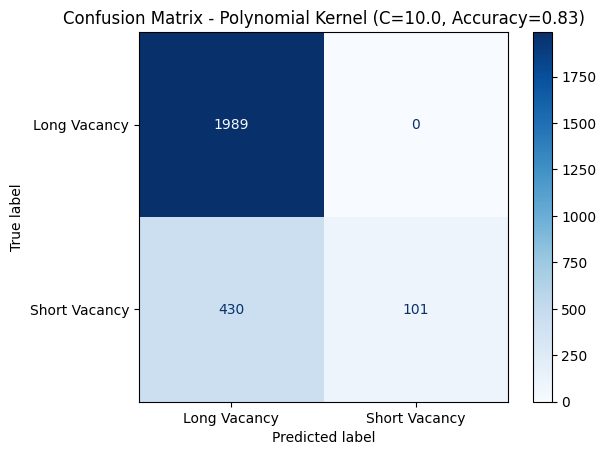

In [11]:
# Polynomial Kernel
print("\nResults for Polynomial Kernel:")
for C in C_values:
    print(f"Polynomial Kernel with C: {C}")
    model = SVC(kernel='poly', C=C, degree=3, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - Polynomial Kernel (C={C}, Accuracy={acc:.2f})")
    plt.show()


Results for RBF Kernel:
RBF Kernel with C: 0.1
Accuracy: 0.83
Confusion Matrix:
[[1989    0]
 [ 430  101]]
Classification Report:
               precision    recall  f1-score   support

 Long Vacancy       0.82      1.00      0.90      1989
Short Vacancy       1.00      0.19      0.32       531

     accuracy                           0.83      2520
    macro avg       0.91      0.60      0.61      2520
 weighted avg       0.86      0.83      0.78      2520



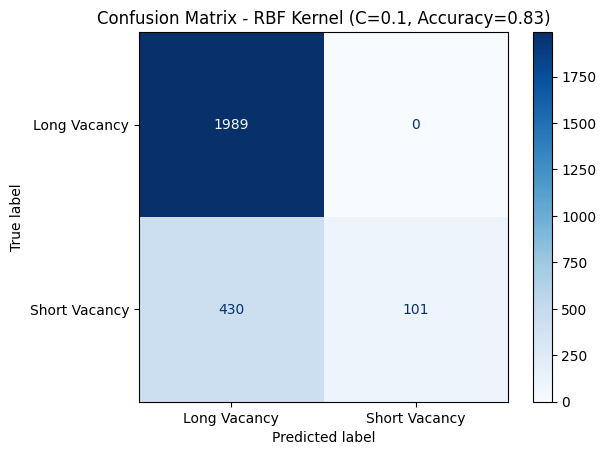

RBF Kernel with C: 1.0
Accuracy: 0.89
Confusion Matrix:
[[1828  161]
 [ 105  426]]
Classification Report:
               precision    recall  f1-score   support

 Long Vacancy       0.95      0.92      0.93      1989
Short Vacancy       0.73      0.80      0.76       531

     accuracy                           0.89      2520
    macro avg       0.84      0.86      0.85      2520
 weighted avg       0.90      0.89      0.90      2520



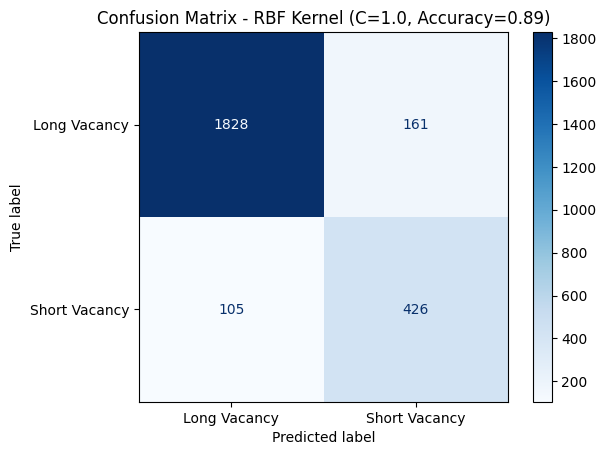

RBF Kernel with C: 10.0
Accuracy: 0.92
Confusion Matrix:
[[1970   19]
 [ 175  356]]
Classification Report:
               precision    recall  f1-score   support

 Long Vacancy       0.92      0.99      0.95      1989
Short Vacancy       0.95      0.67      0.79       531

     accuracy                           0.92      2520
    macro avg       0.93      0.83      0.87      2520
 weighted avg       0.92      0.92      0.92      2520



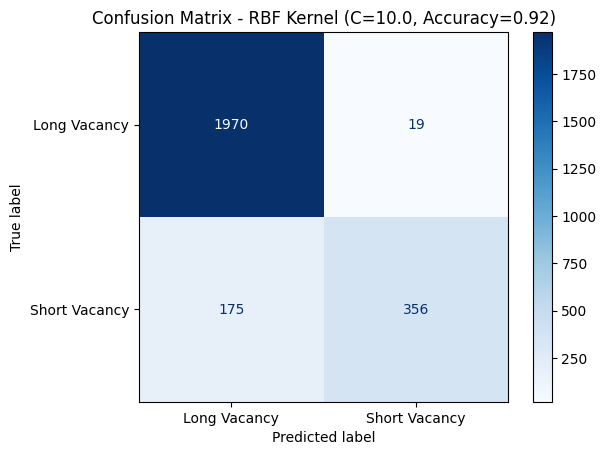

In [12]:
# RBF Kernel
print("\nResults for RBF Kernel:")
for C in C_values:
    print(f"RBF Kernel with C: {C}")
    model = SVC(kernel='rbf', C=C, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - RBF Kernel (C={C}, Accuracy={acc:.2f})")
    plt.show()


In [9]:
# Show the split of training and testing sets
sample_train = pd.DataFrame(X_train[:5], columns=X_train.columns)
sample_test = pd.DataFrame(X_test[:5], columns=X_test.columns)

print("Sample of Training Set:")
print(sample_train)
print("Sample of Testing Set:")
print(sample_test)


Sample of Training Set:
      SalaryMin  SalaryMax  DisabilityMention
6106    45591.0   169378.0              False
3063    47813.0   155403.0              False
7427    31083.0   146757.0              False
1860    41235.0   155403.0              False
8049   112015.0   163252.0              False
Sample of Testing Set:
      SalaryMin  SalaryMax  DisabilityMention
33      47813.0   155403.0              False
5281    46081.0    59907.0              False
4912    57442.0   155403.0              False
3298    47813.0   155403.0              False
4756    78255.0   108995.0              False


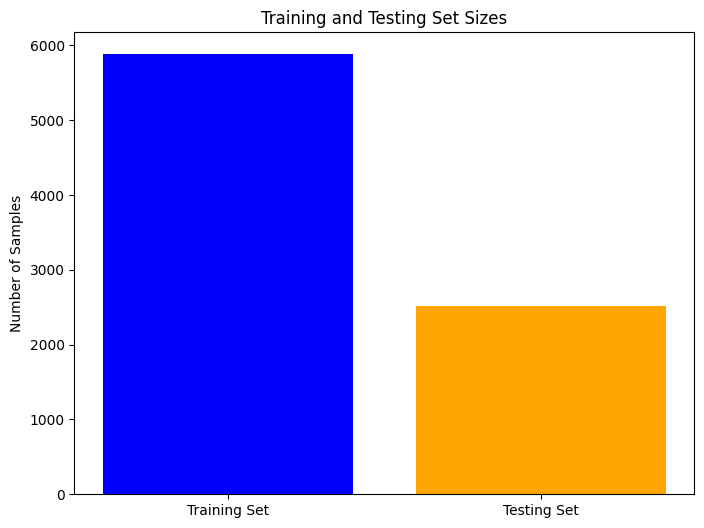

In [10]:
# Visualize the split
plt.figure(figsize=(8, 6))
plt.bar(['Training Set', 'Testing Set'], [len(X_train), len(X_test)], color=['blue', 'orange'])
plt.title("Training and Testing Set Sizes")
plt.ylabel("Number of Samples")
plt.savefig("train_test_split_sizes.png")
plt.show()

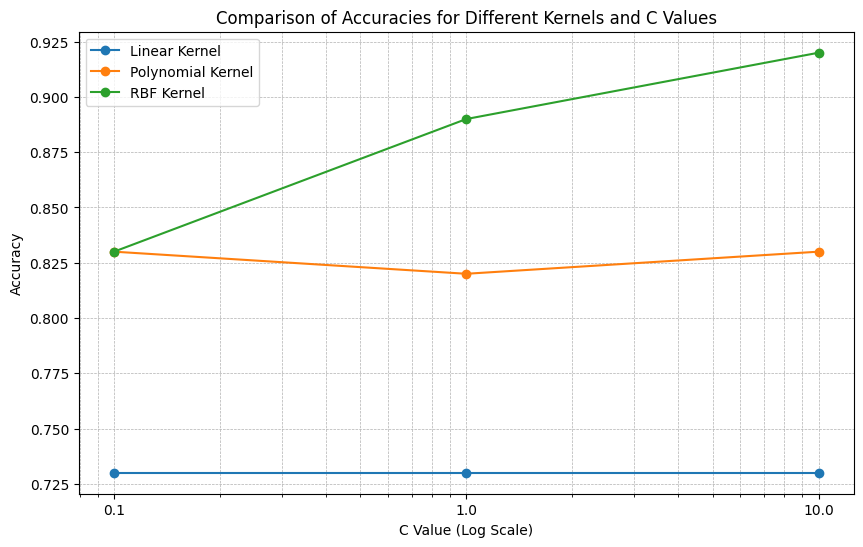

In [14]:
kernels = ['Linear', 'Polynomial', 'RBF']
C_values = [0.1, 1.0, 10.0]
import matplotlib.pyplot as plt

# Redefine data
C_values = [0.1, 1.0, 10.0]
linear_accuracies = [0.73, 0.73, 0.73]
poly_accuracies = [0.83, 0.82, 0.83]
rbf_accuracies = [0.83, 0.89, 0.92]

# Plot with evenly spaced x-axis
plt.figure(figsize=(10, 6))
plt.plot(C_values, linear_accuracies, marker='o', label='Linear Kernel')
plt.plot(C_values, poly_accuracies, marker='o', label='Polynomial Kernel')
plt.plot(C_values, rbf_accuracies, marker='o', label='RBF Kernel')
plt.xscale('log')  # Ensure even scaling for log-based x-axis
plt.xticks(C_values, C_values)  # Ensure specific C values are visible
plt.title("Comparison of Accuracies for Different Kernels and C Values")
plt.xlabel("C Value (Log Scale)")
plt.ylabel("Accuracy")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

